# Regresión lineal con mínimos cuadrados

En este ejemplo aprenderemos a realizar un modelo de regresión lineal usando mínimos cuadrados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Generamos un conjunto de datos empleando el módulo Random, muestreando unformemente 1000 ejemplos entre -5 y 5. Adicionalmente, generamos los valores de los parámetros de nuestra función. Finalmente, agregamos ruido Gaussiano.


In [2]:
# 1000 muestras de dos dimensiones usando una distribución uniforme
X = np.random.uniform(-5,5,(1000,3))
X[:, 0] = 1  # Agregar columna de unos

Fijamos los parámetros $\boldsymbol{\theta}$ manualmente a $[3, -1.0]$

In [3]:
# Generamos los valores de nuestros parámetros
theta_ori = np.array([[10.0],[3.0], [-1.0]])

Suponemos un modelo lineal con dos atributos, esto es,

$$
y_{i}=f_{\mathbf{\theta}}(x_{1},x_{2}) = \theta_{1}x_{1}+\theta_{2}x_{2}+\epsilon,
$$

In [4]:
Y = X.dot(theta_ori) + np.random.normal(loc=0.0, scale=1.0, size=(1000,1))

Recuerda que esto puede ser escrito en notación vectorial como

$$
f_{\mathbf{\theta}}(\mathbf{x}) = \boldsymbol{\theta}^\top \mathbf{x}+\mathbf{\epsilon},
$$

donde $\boldsymbol{\theta}$, $\mathbf{x}$ y $\mathbf{\epsilon}$ son vectores columna.

Graficamos los datos generados

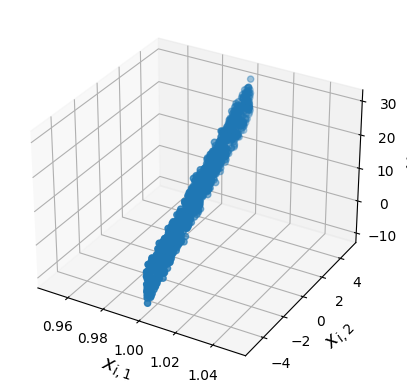

In [5]:
from mpl_toolkits.mplot3d import Axes3D # graficar en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# notice below when we use ":" it allows us to select all the elements along that dimension of the array
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=14)
ax.set_ylabel("$x_{i,2}$", fontsize=14)
ax.set_zlabel('$y_{i}$', fontsize=14)
plt.show()

Generamos conjunto de entrenamiento y prueba (Método Hold out)

In [6]:
from sklearn.model_selection import train_test_split

# Dividimos nuestros datos (80% entrenamiento y 20% prueba):
X_test,X_train,y_test,y_train = train_test_split(X, Y, test_size=0.2, random_state=42)

Estimamos los parámetros por mínimos cuadrados
$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [7]:
# Valores de Theta con mínimos cuadrados:
theta = np.linalg.inv(X_train.T @ X_train)@X_train.T@y_train
print(theta)

[[ 9.89392899]
 [ 3.03735705]
 [-0.98458895]]


Realizamos las predicciones sobre el conjunto de validación:

In [8]:
predictions = X_test @ theta
print(predictions)

[[ 5.51961775e+00]
 [ 3.90228720e+00]
 [-5.00217756e+00]
 [ 5.34017313e+00]
 [ 1.58519389e+01]
 [ 1.46496626e+01]
 [ 6.28042265e+00]
 [ 1.19370737e+01]
 [ 1.52777165e+01]
 [ 1.69753102e+01]
 [-2.26807191e+00]
 [ 2.22160408e+00]
 [ 5.08333138e+00]
 [ 5.03661731e+00]
 [ 9.34971765e+00]
 [ 4.75302131e+00]
 [ 9.15725842e-01]
 [ 7.87596359e+00]
 [ 2.16765008e+01]
 [ 1.23142622e+01]
 [ 1.36197812e+01]
 [ 2.65712649e+01]
 [ 5.06133357e+00]
 [ 1.10965109e+01]
 [ 3.74941921e+00]
 [ 1.60318264e+01]
 [-3.05505089e+00]
 [ 1.55084080e+01]
 [ 2.01565797e+01]
 [ 2.49984974e+00]
 [-5.85562887e+00]
 [ 2.81445238e+01]
 [ 5.80861392e+00]
 [ 7.47997953e+00]
 [ 1.33673000e+01]
 [-6.75710275e+00]
 [ 1.98908951e+01]
 [ 1.70941415e+01]
 [ 2.37538294e+01]
 [ 1.25843079e+01]
 [ 1.23180634e+01]
 [ 1.74426774e+01]
 [ 1.04672711e+01]
 [-2.66379142e+00]
 [ 2.18730571e+01]
 [ 1.65686987e+01]
 [-8.92188837e-01]
 [ 1.05874255e+01]
 [-2.08113869e+00]
 [ 2.20193652e+01]
 [ 2.09449894e+01]
 [ 1.89684063e+01]
 [ 1.9180464

Definimos nuestra función de error, basada en el error cuadrático:

$$
E(\boldsymbol{\theta}) = \frac{1}{N}\sum_{i=1}^N (y_{i}-f_{\mathbf{\theta}}(\mathbf{x}_{i}))^2
$$

In [9]:
sse = lambda y_t, y_p: ((y_t - y_p)**2).mean()

Comparamos los valores estimados contra los valores reales empleando el Error cuadrático medio

In [10]:
ECM = sse(y_test,predictions)
print(ECM)

1.032928523785005


Graficamos el ajuste del modelo de salida:

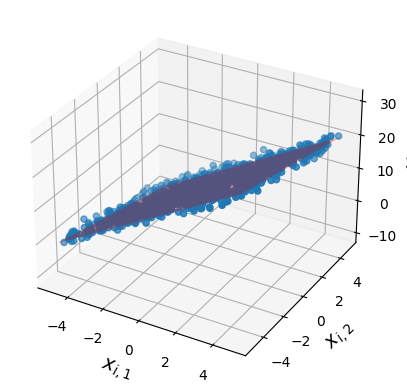

In [11]:
# Betas estimadas
beta0 = theta[0]
beta1 = theta[1]
beta2 = theta[2]

# Definir el plano
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 10),
                             np.linspace(X[:, 2].min(), X[:, 2].max(), 10))
z_surf = beta0 + beta1 * x_surf + beta2 * y_surf

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gráfico de puntos
ax.scatter(X[:, 1], X[:, 2], Y)

# Gráfico del plano
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel("$x_{i,1}$", fontsize=14)
ax.set_ylabel("$x_{i,2}$", fontsize=14)
ax.set_zlabel("$y_{i}$", fontsize=14)

plt.show()

# Regresión lineal Descenso del gradiante

In [12]:
# Variables del modelo:
learning_rate = 0.01
iterations = 1000

In [13]:
# Inicializa una matriz de pesos:
weights = np.random.rand(3, 1)

# Descenso del gradiente:
for _ in range(iterations):

  n = len(X_train)
  y_predicted = X_train @ weights

  error = y_predicted - y_train
  cost_derivate = (2 / n) * np.dot(X_train.T,error)

  weights -= learning_rate * cost_derivate

In [14]:
print("Pesos calculados con Descenso del Gradiente:\n", weights)

Pesos calculados con Descenso del Gradiente:
 [[ 9.89392897]
 [ 3.03735705]
 [-0.98458895]]


In [15]:
print("Pesos calculados con Mínimos Cuadrados:\n", theta)

Pesos calculados con Mínimos Cuadrados:
 [[ 9.89392899]
 [ 3.03735705]
 [-0.98458895]]
